In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PreProcessing

In [2]:
dataset=pd.read_csv("creditcard.csv")
dataset.shape

(284807, 31)

In [3]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pd.Series(dataset['Class']).value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

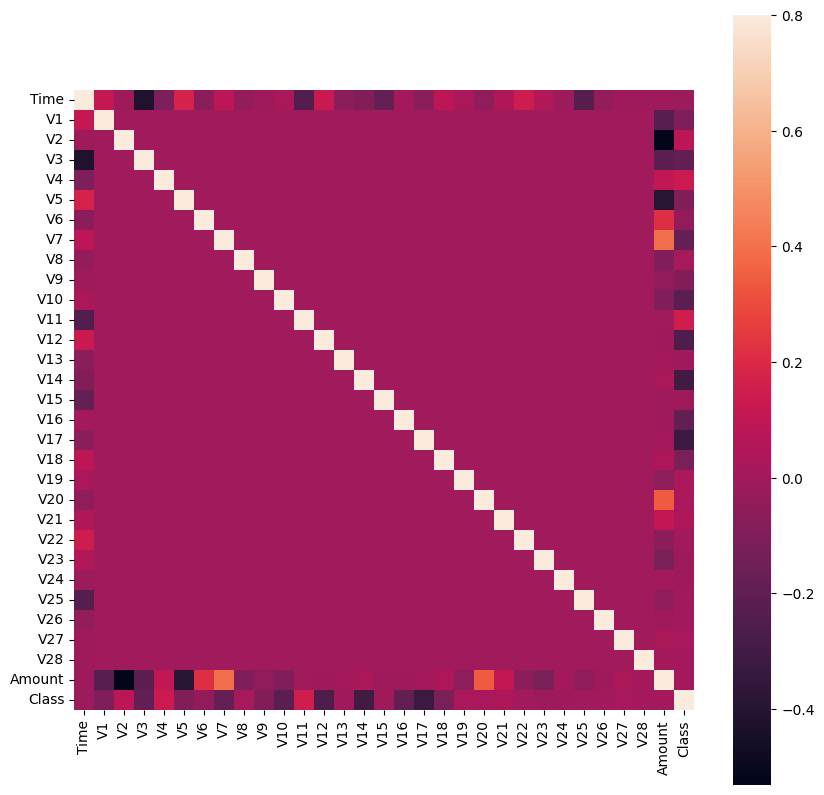

In [6]:
corrmat=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [7]:
len(dataset[dataset['Class']==0]) 

284315

In [8]:
len(dataset[dataset['Class']==1]) 

492

In [9]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

UnderSampling

In [10]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_ures,y_ures=nm.fit_resample(X, y)

In [11]:
X.shape
x_ures.shape

(984, 30)

In [12]:
from collections import Counter
print(f'Before under sampling : {Counter(y)}')
print(f'After Under Sampling : {Counter(y_ures)}')

Before under sampling : Counter({0: 284315, 1: 492})
After Under Sampling : Counter({0: 492, 1: 492})


OverSampling

In [13]:
# from imblearn.combine import SMOTETomek
# sm=SMOTETomek(random_state=0)
# x_ores,y_ores=sm.fit_resample(X , y)

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_ores,y_ores=ros.fit_resample(X, y)

In [15]:
X.shape
x_ores.shape

(568630, 30)

In [16]:
print(f'Before over sampling :{Counter(y)}')
print(f'After over sampling :{Counter(y_ores)}')     

Before over sampling :Counter({0: 284315, 1: 492})
After over sampling :Counter({0: 284315, 1: 284315})


Splitting Data into Train Set and Test Set

For UnderSampled Data

In [17]:
from sklearn.model_selection import train_test_split
x_utrain,x_utest,y_utrain,y_utest=train_test_split(x_ures,y_ures,test_size=0.3,random_state=42)

In [18]:
x_utrain.shape
y_utrain.shape

(688,)

Training

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=29,random_state=0)
classifier.fit(x_utrain,y_utrain)

RandomForestClassifier(n_estimators=29, random_state=0)

In [20]:
y_upred=classifier.predict(x_utest)

Evaluation Metrics

0.972972972972973


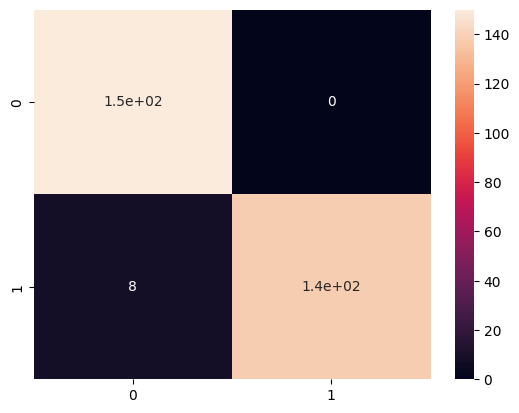

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_utest,y_upred)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_utest,y_upred))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_utest,y_upred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       150
           1       1.00      0.95      0.97       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



For OverSampled Data

In [23]:
from sklearn.model_selection import train_test_split
x_otrain,x_otest,y_otrain,y_otest=train_test_split(x_ores,y_ores,test_size=0.3,random_state=42)

In [24]:
x_otrain.shape
y_otrain.shape

(398041,)

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=341,random_state=0)
classifier.fit(x_otrain,y_otrain)

RandomForestClassifier(n_estimators=341, random_state=0)

In [26]:
y_opred=classifier.predict(x_otest)

0.9999589657011883


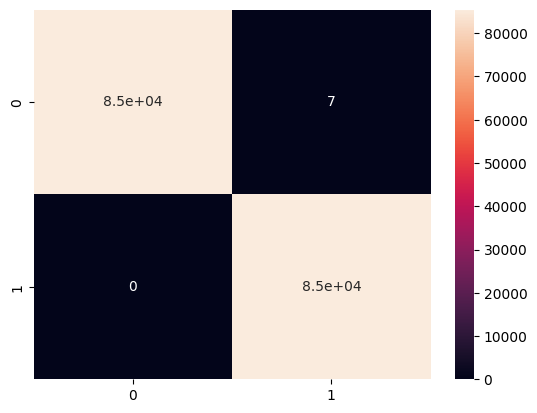

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_otest,y_opred)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_otest,y_opred))

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_otest,y_opred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

